### Import Libraries

In this cell, we import the necessary Python libraries and modules required for our classification problem. These libraries will help us with data manipulation, visualization, preprocessing, and model building.

- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib.pyplot` for data visualization
- `seaborn` for enhanced data visualization
- `LabelEncoder` from `sklearn.preprocessing` for encoding categorical labels
- `StandardScaler` and `MinMaxScaler` from `sklearn.preprocessing` for feature scaling
- `train_test_split` from `sklearn.model_selection` to split the dataset into training and testing sets
- `GridSearchCV` and `RandomizedSearchCV` from `sklearn.model_selection` for hyperparameter tuning
- `LogisticRegression` from `sklearn.linear_model` for logistic regression
- `RandomForestClassifier` from `sklearn.ensemble` for the random forest classifier
- `XGBClassifier` from `xgboost` for the XGBoost classifier
- `accuracy_score`, `confusion_matrix`, `ConfusionMatrixDisplay`, `precision_score`, `recall_score`, and `f1_score` from `sklearn.metrics` for model evaluation
- `PCA` from `sklearn.decomposition` for Principal Component Analysis
- `SVC` and `LinearSVC` from `sklearn.svm` for support vector classification
- Import the Multinomial Naive Bayes classifier from `sklearn.naive_bayes`.
-Import the AdaBoost Classifier from `sklearn.ensemble`. like `from sklearn.ensemble import AdaBoostClassifier`
  


We also filter out any warnings to ensure a cleaner output.

Now that we have our libraries and modules imported, we can proceed with the analysis and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Load the Dataset

In this cell, we load the dataset that contains information about hospital inpatient discharges in New York State for the year 2010. The data is read from a CSV file using the `pd.read_csv` function from the Pandas library.

The dataset is stored in the variable `hospital_data`, and we set `low_memory` to `False` to ensure that Pandas allocates sufficient memory for data processing.

Now, let's take a closer look at the dataset and perform some exploratory data analysis to better understand its structure and content.

In [3]:
hospital_data = pd.read_csv('/kaggle/input/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv', low_memory=False)

In [4]:
hospital_data

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Blue Cross,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,2010,231.0,OTHER FRACTURE,61.0,OT OR PRCS VES NOT HEAD,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Extreme,Surgical,Insurance Company,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2010,42.0,SECONDARY MALIGNANCY,0.0,NO PROC,240,DIGESTIVE MALIGNANCY,6,Diseases and Disorders of the Digestive System,3,Major,Major,Medical,Medicare,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,2010,254.0,REHAB/PROSTH FIT/ADJUST,215.0,OT PHYS THER/REHAB,860,REHABILITATION,23,"Rehabilitation, Aftercare, Other Factors Influ...",2,Moderate,Minor,Medical,Medicare,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,2010,203.0,OSTEOARTHRITIS,153.0,"HIP REPLACEMENT,TOT/PRT",301,HIP JOINT REPLACEMENT,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Surgical,Medicare,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,29,Emergency,Home w/ Home Health Services,2010,181.0,OTHR PREGNANCY COMPL,75.0,SMALL BOWEL RESECTON,546,OTHER O.R. PROC FOR OBSTETRIC DIAGNOSES EXCEPT...,14,"Pregnancy, Childbirth and the Puerperium",3,Major,Minor,Surgical,Blue Cross,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,1,Urgent,Home or Self Care,2010,181.0,OTHR PREGNANCY COMPL,128.0,DX DILAT/CURETTAGE -D&C,544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",2,Moderate,Minor,Surgical,Blue Cross,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,4,Emergency,Home or Self Care,2010,178.0,INDUCED ABORTION,126.0,ABORTION (TERM OF PREG),544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",1,Minor,Minor,Surgical,Insurance Company,Self-Pay,NaN,NaN,NaN,NaN,0

In [5]:
hospital_data['Abortion Edit Indicator'].value_counts()

Abortion Edit Indicator
N    2617246
Y       4887
Name: count, dtype: int64

### Missing Data Analysis

In this cell, we calculate the percentage of missing values for each column in the dataset. This information is important for understanding the data quality and deciding how to handle missing data during preprocessing.

In [6]:
(hospital_data.isnull().sum())/hospital_data.shape[0]

index                                  0.000000
Health Service Area                    0.001864
Hospital County                        0.001864
Operating Certificate Number           0.001864
Facility ID                            0.001864
Facility Name                          0.000000
Age Group                              0.000000
Zip Code - 3 digits                    0.001221
Gender                                 0.000000
Race                                   0.000000
Ethnicity                              0.000000
Length of Stay                         0.000000
Type of Admission                      0.000000
Patient Disposition                    0.000039
Discharge Year                         0.000000
CCS Diagnosis Code                     0.000867
CCS Diagnosis Description              0.000867
CCS Procedure Code                     0.000867
CCS Procedure Description              0.000867
APR DRG Code                           0.000000
APR DRG Description                    0

In [7]:
hospital_data['APR Risk of Mortality'].value_counts()

APR Risk of Mortality
Minor       1644151
Moderate     554542
Major        300829
Extreme      122370
Name: count, dtype: int64

### Data Column Selection

In this cell, we modify the dataset by dropping specific columns that are not necessary for our analysis or contain redundant information. Here's the reasons behind dropping each of these columns:

- `Discharge Year`: This column is dropped because it contains a single constant value (2010) for the entire dataset, making it non-informative.

- `Other Provider License Number`, `Operating Provider License Number`, `Source of Payment 3`, `Source of Payment 2`: These columns are removed due to a high percentage of missing values, which may not provide meaningful information.

- `index`: We don't need the index column, as Pandas automatically assigns row indices to the DataFrame.

- `CCS Diagnosis Description`, `CCS Procedure Description`, `APR DRG Description`, `APR MDC Description`, `APR Severity of Illness Description`: These columns are not needed because the information they contain can be obtained from label-encoded columns in the dataset, making them redundant.

By removing these columns, we streamline the dataset and focus on the most relevant features for our analysis. This helps reduce dimensionality and improve the efficiency of subsequent data processing steps.


In [8]:
hospital_data['Discharge Year'].value_counts()

Discharge Year
2010    2622133
Name: count, dtype: int64

In [9]:
hospital_data_final = hospital_data.drop(['Discharge Year','Other Provider License Number', 'Operating Provider License Number', 'Source of Payment 3', 'Source of Payment 2', 'index','CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description'], axis=1)

In [10]:
hospital_data_final.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,135.0,0.0,249,6,1,Minor,Medical,Blue Cross,3623.0,0,N,Y,4476.23,1672.65
1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,231.0,61.0,912,25,3,Extreme,Surgical,Insurance Company,216951.0,0,N,Y,148612.34,51414.70
2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,42.0,0.0,240,6,3,Major,Medical,Medicare,3076.0,0,N,N,16561.99,4032.49
3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,254.0,215.0,860,23,2,Minor,Medical,Medicare,140796.0,0,N,N,13593.51,4947.81
4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,203.0,153.0,301,8,1,Minor,Surgical,Medicare,170254.0,0,N,N,31962.58,16988.33


### Data Distribution and Class Frequency

In this cell, we create plots to visualize the distribution of data and the frequency of classes in specific columns. The columns under analysis are:

- `Health Service Area`: This plot helps us understand the geographical distribution of health service areas within the dataset.

- `Hospital County`: It provides insights into the distribution of hospitals across different counties.

- `Operating Certificate Number`: This plot may reveal patterns or clusters related to operating certificate numbers.

- `Zip Code - 3 digits`: Visualizing the distribution of zip codes in three digits can help identify any regional trends.

- `Patient Disposition`: By plotting the class frequencies, we can better understand the distribution of patient dispositions.

- `CCS Diagnosis Code` and `CCS Procedure Code`: These plots can provide insights into the distribution of diagnostic and procedural codes.

- `APR Risk of Mortality`: A plot of the risk of mortality levels can help identify the distribution of patient risk within the dataset.

Visualizing these distributions and class frequencies is a crucial step in exploratory data analysis (EDA) to gain a better understanding of the dataset and identify any patterns or anomalies in the data.


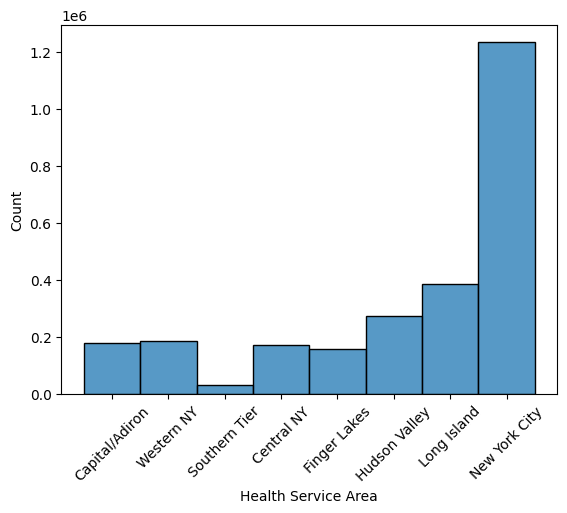

In [11]:
sns.histplot(data = hospital_data_final, x='Health Service Area')
plt.xticks(rotation=45)
plt.show()

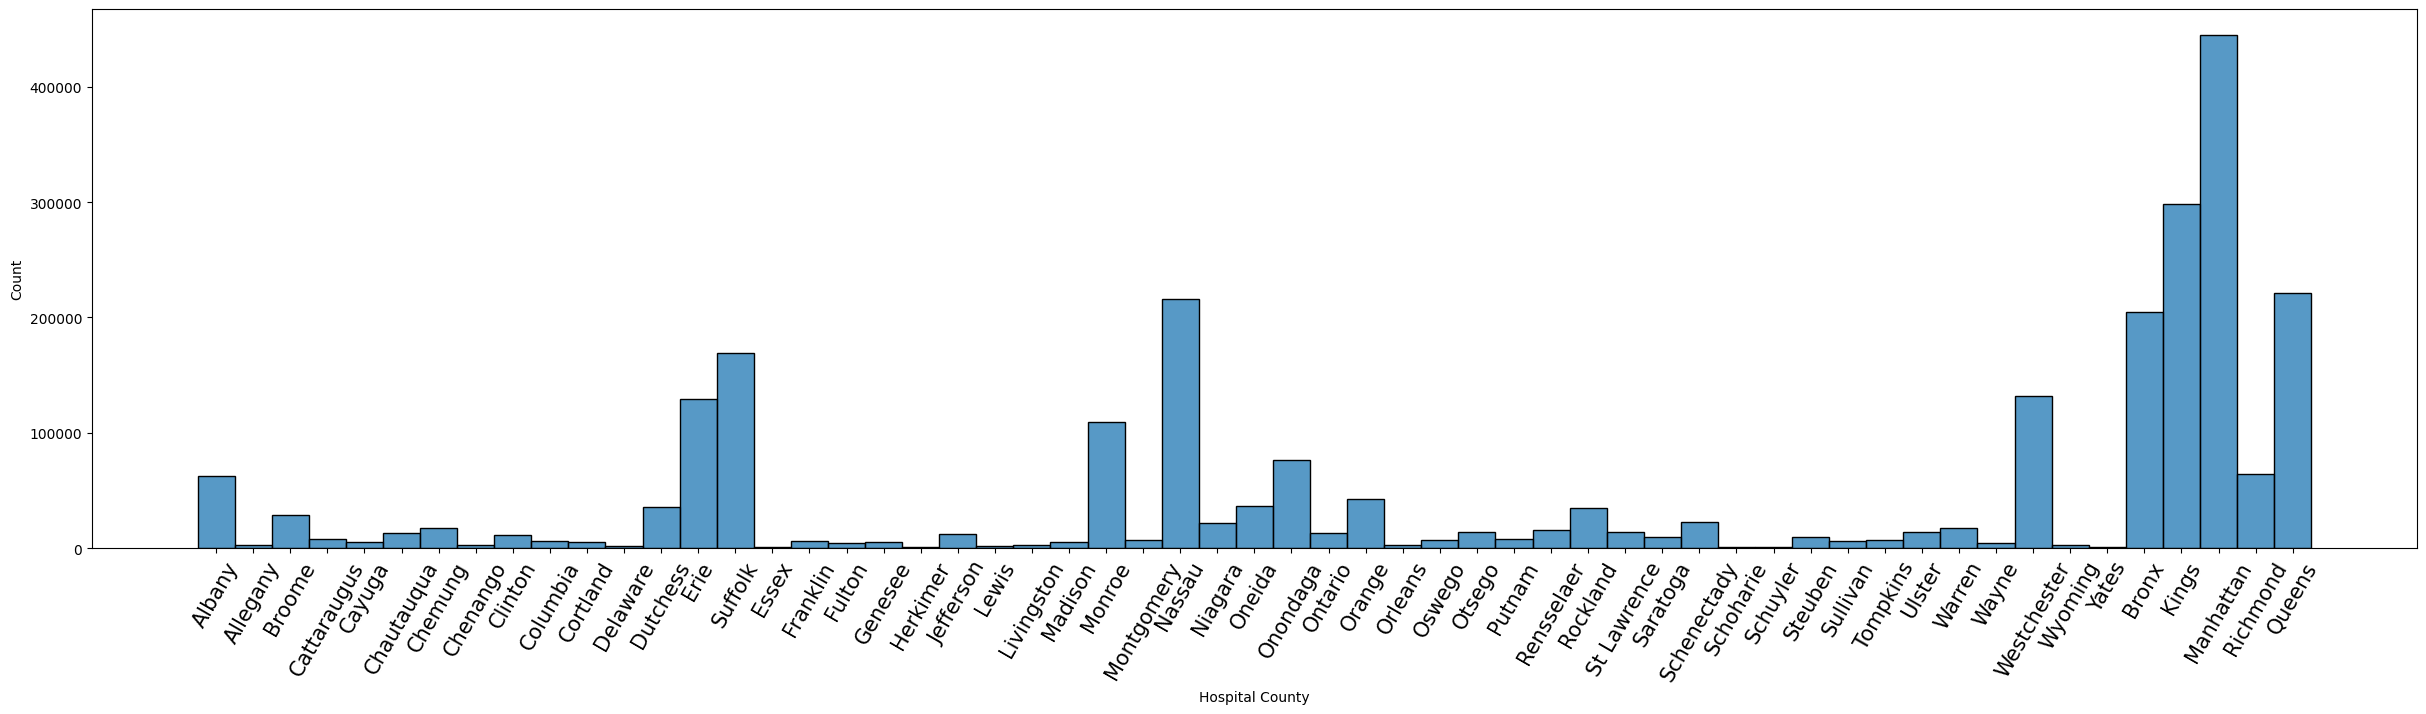

In [12]:
plt.figure(figsize=(30,7))
sns.histplot(data = hospital_data_final, x='Hospital County')
plt.xticks(rotation=60,fontsize=15)
plt.show()

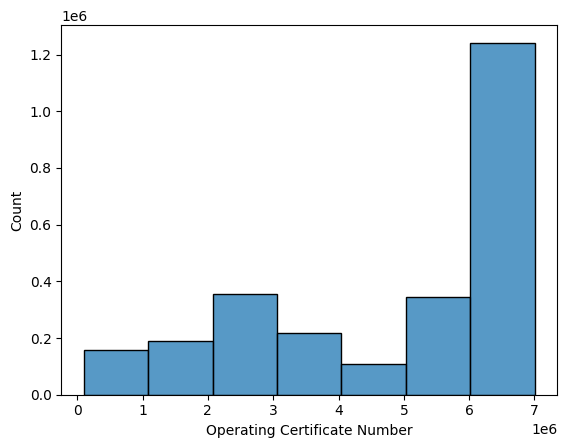

In [13]:
sns.histplot(data = hospital_data_final, x='Operating Certificate Number', bins = 7)
plt.show()

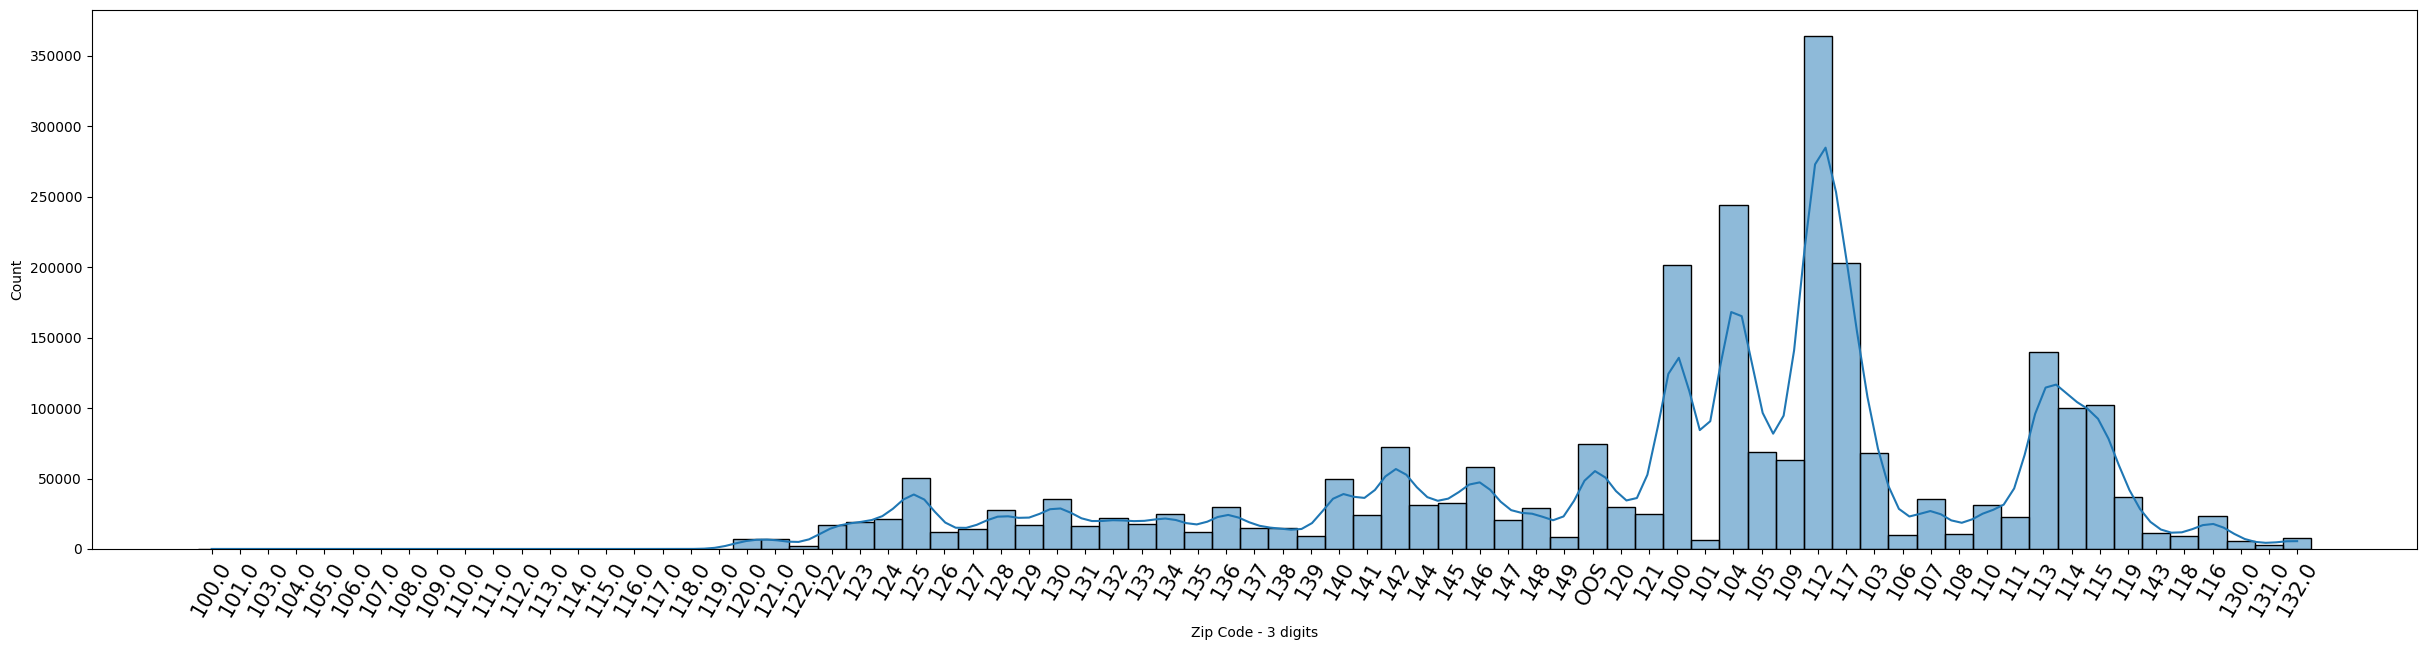

In [14]:
plt.figure(figsize=(30,7))
sns.histplot(data = hospital_data_final, x='Zip Code - 3 digits', kde = True)
plt.xticks(rotation=60,fontsize=15)
plt.show()

In [15]:
hospital_data_final['Zip Code - 3 digits'].value_counts()

Zip Code - 3 digits
112      364357
104      243938
117      202733
100      201754
113      139877
          ...  
111.0         3
108.0         3
106.0         3
101.0         3
118.0         1
Name: count, Length: 75, dtype: int64

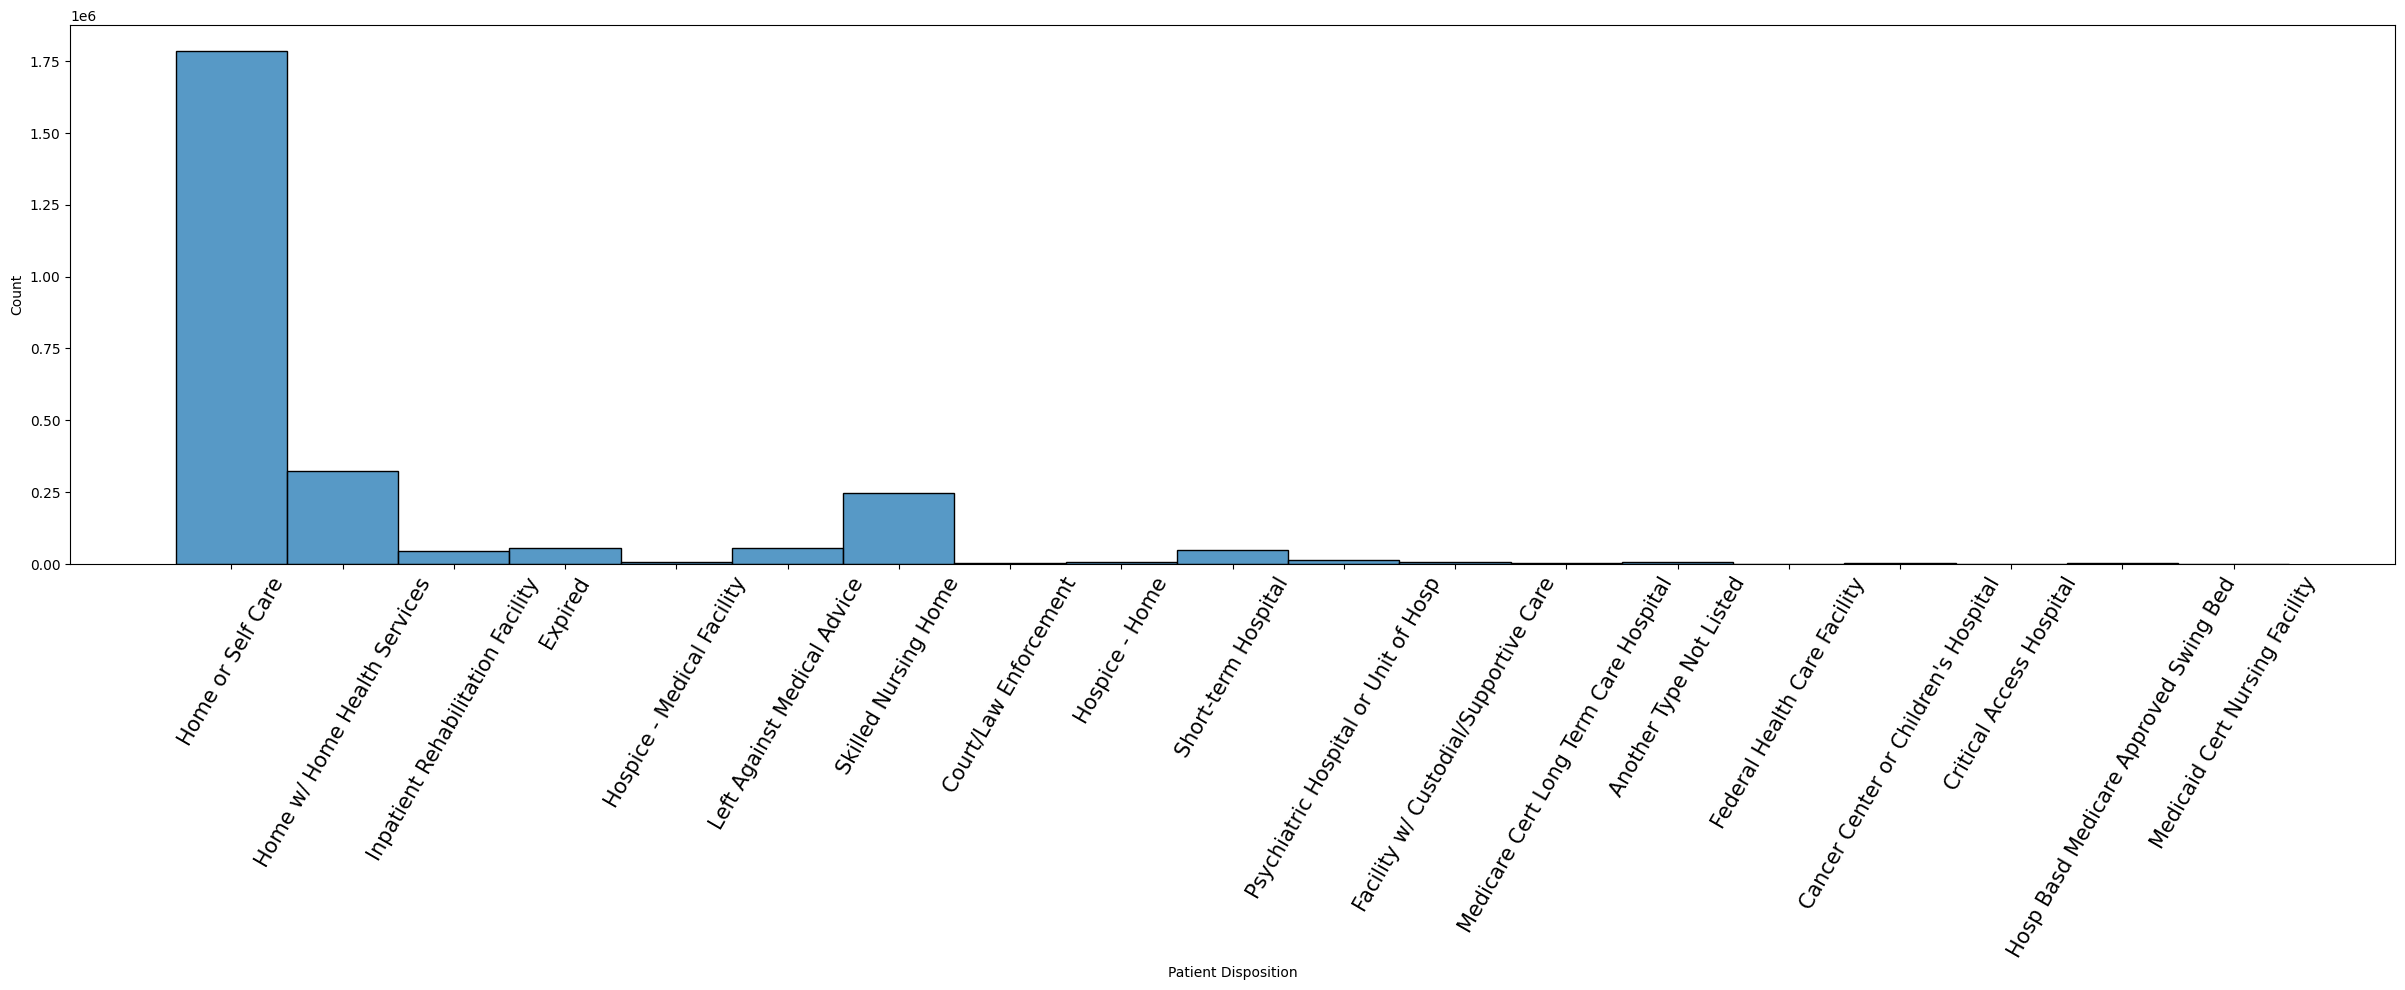

In [16]:
plt.figure(figsize=(30,7))
sns.histplot(data = hospital_data_final, x='Patient Disposition')
plt.xticks(rotation=60,fontsize=15)
plt.show()

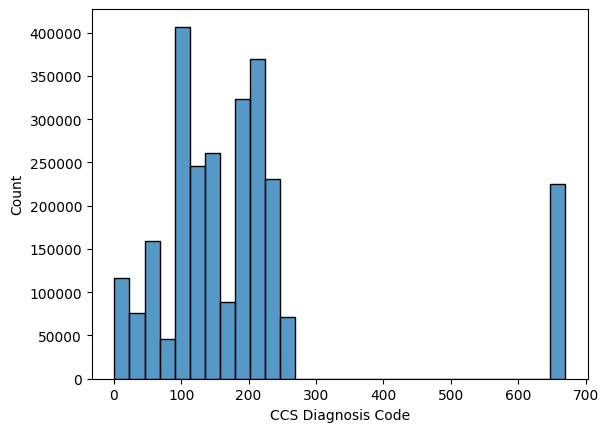

In [17]:
sns.histplot(data = hospital_data_final, x='CCS Diagnosis Code',bins=30)
plt.show()

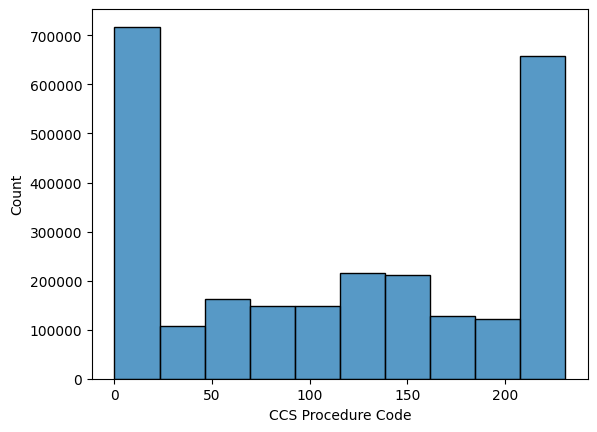

In [18]:
sns.histplot(data = hospital_data_final, x='CCS Procedure Code',bins=10)
plt.show()

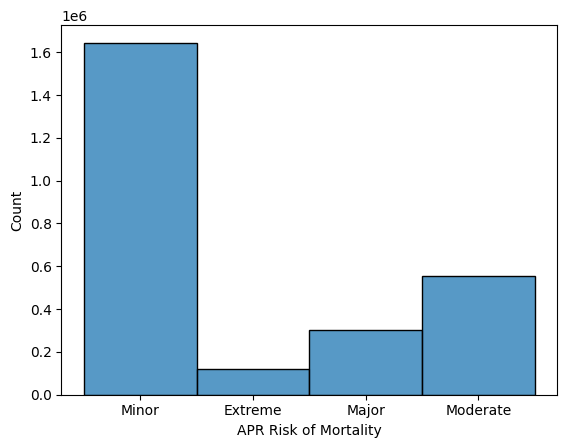

In [19]:
sns.histplot(data = hospital_data_final, x='APR Risk of Mortality')
plt.show()

In [20]:
hospital_data_final['Attending Provider License Number'].value_counts()

Attending Provider License Number
223563.0    4476
195267.0    4338
149709.0    3333
175020.0    3182
153130.0    2859
            ... 
188048.0       1
210130.0       1
240973.0       1
211688.0       1
199095.0       1
Name: count, Length: 30086, dtype: int64

### Handling Null Values

So, how I handle null values in the dataset. Specifically, we address the following columns with null values:

- `Health Service Area`, `Hospital County`, `Operating Certificate Number`, `Facility ID`, and `Attending Provider License Number`: These columns have 4887 null values, which occur in the same rows. Since this represents a small fraction of the total dataset (26 lakhs), I choose to drop the rows with null values in these columns to ensure data integrity.

- `CCS Diagnosis Code` and `CCS Procedure Code`: These columns have 2273 null values. To maintain data consistency, I also choose to drop the rows with null values in these columns.

- `APR Risk of Mortality`: This column contains the target variable I aim to predict. It has 241 null values. To avoid introducing incorrect information, I opt to drop rows with null values in this column. These rows do not contribute to the prediction task.

By carefully handling null values, we maintain data quality and ensure that our analysis and modeling are based on clean and reliable data.


In [21]:
hospital_data_final.isnull().sum()

Health Service Area                  4887
Hospital County                      4887
Operating Certificate Number         4887
Facility ID                          4887
Facility Name                           0
Age Group                               0
Zip Code - 3 digits                  3201
Gender                                  0
Race                                    0
Ethnicity                               0
Length of Stay                          0
Type of Admission                       0
Patient Disposition                   103
CCS Diagnosis Code                   2273
CCS Procedure Code                   2273
APR DRG Code                            0
APR MDC Code                            0
APR Severity of Illness Code            0
APR Risk of Mortality                 241
APR Medical Surgical Description        0
Source of Payment 1                     0
Attending Provider License Number    4887
Birth Weight                            0
Abortion Edit Indicator           

In [22]:
hospital_data_final = hospital_data_final.dropna(subset=['Health Service Area', 'CCS Diagnosis Code', 'APR Risk of Mortality'])

### Dropping 'Abortion Edit Indicator' Feature

- **Value Counts**: I am using the `value_counts()` method to check the distribution of values in the 'Abortion Edit Indicator' column. This helps us understand the frequency of different values within the feature.

- **Reason for Dropping**: Upon analyzing the value counts, we observe that one particular value dominates the entire feature with a count of N 2614735. This indicates that the feature contains a single predominant value, which doesn't provide meaningful variation and is unlikely to contribute to our analysis.

- **Dropping the Feature**: As the 'Abortion Edit Indicator' feature doesn't offer valuable information due to the overwhelming presence of a single value, I decide to drop this feature from the dataset to simplify and streamline our analysis.



In [23]:
hospital_data_final['Abortion Edit Indicator'].value_counts()

Abortion Edit Indicator
N    2614735
Name: count, dtype: int64

In [24]:
hospital_data_final = hospital_data_final.drop(['Abortion Edit Indicator'], axis=1)

In [25]:
hospital_data_final.isnull().sum()

Health Service Area                     0
Hospital County                         0
Operating Certificate Number            0
Facility ID                             0
Facility Name                           0
Age Group                               0
Zip Code - 3 digits                  3200
Gender                                  0
Race                                    0
Ethnicity                               0
Length of Stay                          0
Type of Admission                       0
Patient Disposition                   103
CCS Diagnosis Code                      0
CCS Procedure Code                      0
APR DRG Code                            0
APR MDC Code                            0
APR Severity of Illness Code            0
APR Risk of Mortality                   0
APR Medical Surgical Description        0
Source of Payment 1                     0
Attending Provider License Number       0
Birth Weight                            0
Emergency Department Indicator    

### Handling Null Values in 'Patient Disposition'

 The decision to fill these null values with 'Home or Self Care' is based on the following reasons:

- 'Home or Self Care' is chosen as the fill value because it represents a common and frequently occurring class within the 'Patient Disposition' feature. This choice is made to minimize the impact of null values on the dataset, as it is a common disposition for many patients.

By filling null values with a frequently occurring class, we ensure that the data remains representative of real-world scenarios while avoiding the introduction of bias or incorrect information.


In [26]:
hospital_data_final['Patient Disposition'].value_counts()

Patient Disposition
Home or Self Care                        1779863
Home w/ Home Health Services              321491
Skilled Nursing Home                      245913
Left Against Medical Advice                56810
Expired                                    56067
Short-term Hospital                        47148
Inpatient Rehabilitation Facility          44419
Psychiatric Hospital or Unit of Hosp       15299
Hospice - Medical Facility                  8619
Another Type Not Listed                     8535
Hospice - Home                              8530
Facility w/ Custodial/Supportive Care       7280
Cancer Center or Children's Hospital        5026
Medicare Cert Long Term Care Hospital       3475
Court/Law Enforcement                       3308
Hosp Basd Medicare Approved Swing Bed       2041
Federal Health Care Facility                 718
Medicaid Cert Nursing Facility                46
Critical Access Hospital                      44
Name: count, dtype: int64

In [27]:
hospital_data_final['Patient Disposition'] = hospital_data_final['Patient Disposition'].fillna('Home or Self Care')

In [28]:
hospital_data_final.isnull().sum()

Health Service Area                     0
Hospital County                         0
Operating Certificate Number            0
Facility ID                             0
Facility Name                           0
Age Group                               0
Zip Code - 3 digits                  3200
Gender                                  0
Race                                    0
Ethnicity                               0
Length of Stay                          0
Type of Admission                       0
Patient Disposition                     0
CCS Diagnosis Code                      0
CCS Procedure Code                      0
APR DRG Code                            0
APR MDC Code                            0
APR Severity of Illness Code            0
APR Risk of Mortality                   0
APR Medical Surgical Description        0
Source of Payment 1                     0
Attending Provider License Number       0
Birth Weight                            0
Emergency Department Indicator    

### Preprocessing 'Zip Code - 3 digits'

The column contains string values that may have variations, such as '100' and '100.0'. To ensure consistency, we have performed the following preprocessing steps:

1. Truncating Zip Codes: We have truncated all zip code values to a uniform length of 3 characters by taking only the first 3 characters of the string. This ensures that zip codes are consistent in format and facilitates analysis.

2. Handling 'OOS' Values: There is a special class denoted as 'OOS', which stands for 'out of stock'. To make it consistent with other zip codes, we have replaced 'OOS' with '000'

By applying these preprocessing steps, we maintain data consistency and make it easier to work with zip code information in subsequent analysis and modeling.


In [29]:
hospital_data_final['Zip Code - 3 digits'] = hospital_data_final['Zip Code - 3 digits'].replace('OOS', '000')

In [30]:
hospital_data_final['Zip Code - 3 digits'] = hospital_data_final['Zip Code - 3 digits'].str[:3]

In [31]:
hospital_data_final['Zip Code - 3 digits'].value_counts()

Zip Code - 3 digits
112    363089
104    243067
117    202368
100    201460
113    139537
115    102190
114     99958
000     74129
142     72205
105     68472
103     67927
109     63410
146     58400
125     50496
140     49891
130     41087
120     36700
119     36674
107     35472
145     32411
121     31875
144     31428
110     30818
136     29869
132     29731
148     29171
128     27337
134     24615
141     23735
116     23470
111     22881
124     20976
147     20795
131     19465
123     19009
122     18986
133     17664
129     17292
138     14849
137     14793
127     13877
135     12150
126     12082
143     11301
108     10702
106     10169
139      9488
118      9268
149      8448
101      6348
Name: count, dtype: int64

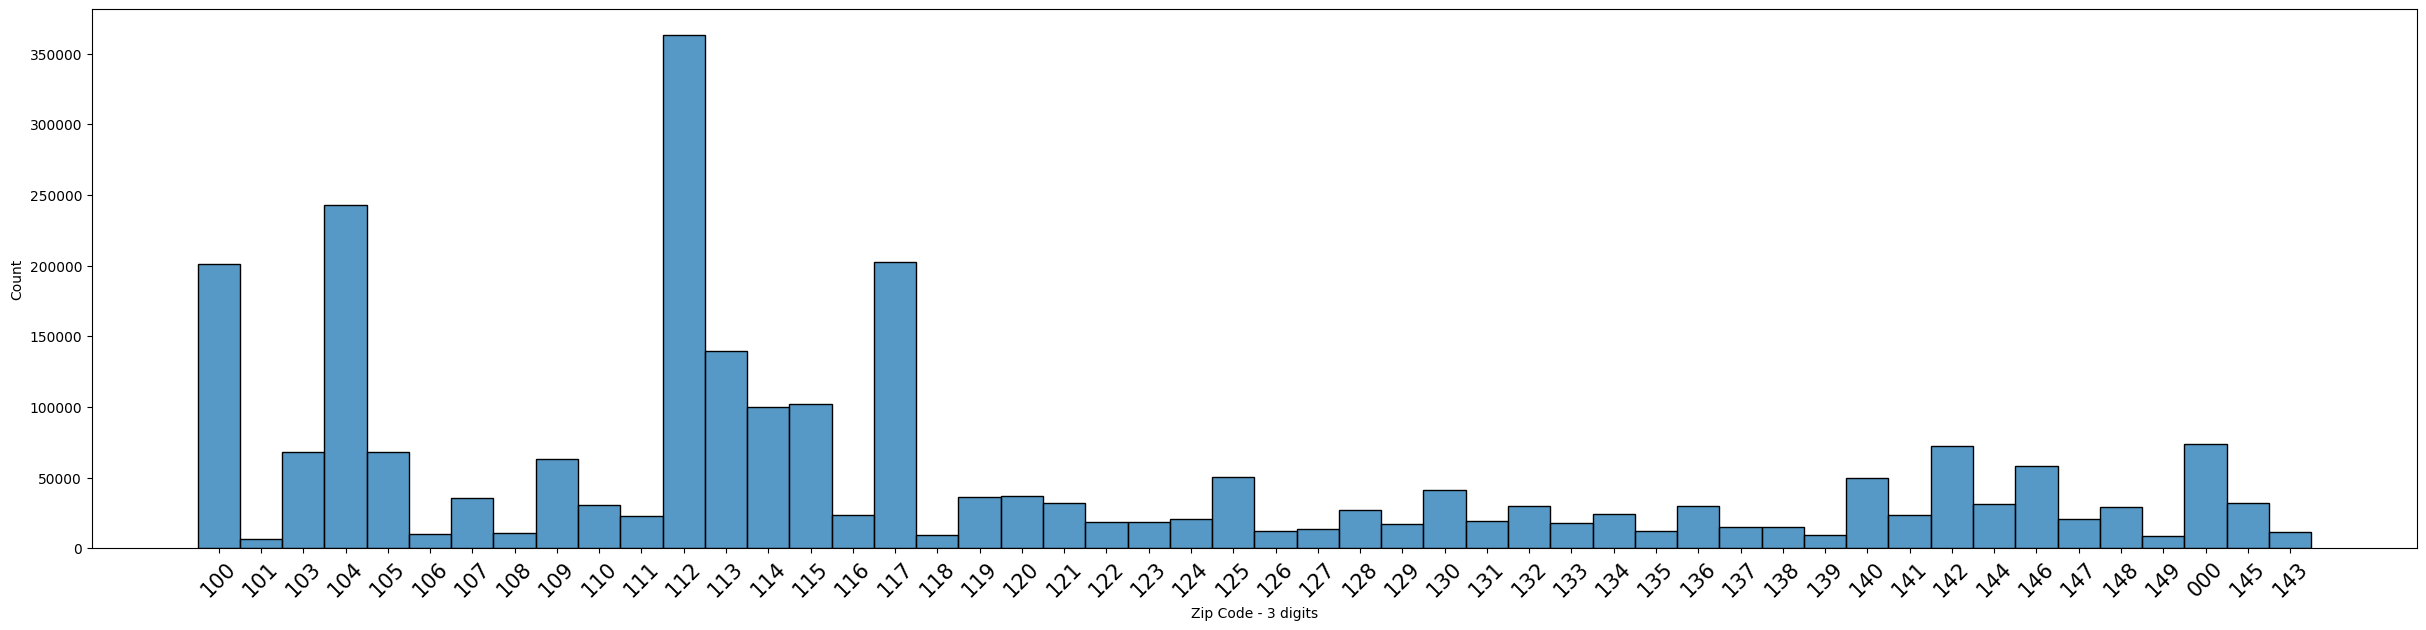

In [32]:
plt.figure(figsize=(30,7))
sns.histplot(data = hospital_data_final, x='Zip Code - 3 digits')
plt.xticks(fontsize=15, rotation=45)
plt.show()

### Handling Null Values in 'Zip Code - 3 digits'

- Geographic Association: Zip codes are often associated with specific geographic regions, in this case, 'Hospital County.' Therefore, the mode zip code for a particular county is likely to be a good representation of the area's zip codes.

- Data Imputation: By using the mode of the zip codes within each 'Hospital County,' we aim to impute missing values with values that are most representative of the location, reducing the potential for introducing incorrect or biased information.


In [33]:
hospital_data_final['Zip Code - 3 digits'] = hospital_data_final['Zip Code - 3 digits'].fillna(hospital_data_final.groupby('Hospital County')['Zip Code - 3 digits'].transform(lambda x: x.mode().iloc[0]))

In [34]:
hospital_data_final['Age Group'].value_counts()

Age Group
70 or Older    724471
50 to 69       679466
30 to 49       544536
0 to 17        386842
18 to 29       279420
Name: count, dtype: int64

### Label Encoding of Categorical Columns

I performed label encoding on selected categorical columns to convert them into numerical values. Label encoding is a common technique used to prepare categorical data for machine learning models. The columns that have undergone label encoding are:

- `Zip Code - 3 digits`
- `Health Service Area`
- `Hospital County`
- `Facility Name`
- `Gender`
- `Race`
- `Ethnicity`
- `Type of Admission`
- `Patient Disposition`
- `APR Risk of Mortality`
- `APR Medical Surgical Description`
- `Source of Payment 1`
- `Emergency Department Indicator`
- `Age Group`

Label encoding assigns a unique integer to each category within these columns. This transformation is essential for machine learning models, as they require numerical inputs. However, it's important to note that label encoding may introduce ordinal relationships between categories, which should be considered in model interpretation.


In [35]:
hospital_data_final[['Zip Code - 3 digits','Health Service Area','Hospital County','Facility Name','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','APR Risk of Mortality','APR Medical Surgical Description','Source of Payment 1','Emergency Department Indicator','Age Group']] = hospital_data_final[['Zip Code - 3 digits','Health Service Area','Hospital County','Facility Name','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','APR Risk of Mortality','APR Medical Surgical Description','Source of Payment 1','Emergency Department Indicator','Age Group']].apply(LabelEncoder().fit_transform)

### Data Type Conversion and Preprocessing for 'Length of Stay'

- Checking Data Type: Initially, we check the data type of the first entry in the 'Length of Stay' column, which is a string ('str'). This initial check helps us understand its format and raises the question of whether it should be converted to a numerical format.

- Replacing '120 +': We notice that some entries have '120 +' in the 'Length of Stay' column. To maintain uniformity, we replace '120 +' with '120'.

- Data Type Conversion Consideration: While the 'Length of Stay' column can be label encoded, it's essential to consider that it represents the number of days a patient has stayed in the hospital. Label encoding may not be suitable in this context since 'Length of Stay' is a numeric attribute with ordinal meaning. Converting it to a numeric data type allows for meaningful analysis, mathematical operations, and modeling without losing the ordinal nature of the variable.

By performing these steps and keeping 'Length of Stay' as a numeric attribute, we ensure that the data remains in a format that accurately represents the patient's length of stay and is beneficial for analysis.


In [36]:
type(hospital_data_final['Length of Stay'][0])

str

In [37]:
hospital_data_final['Length of Stay'] = hospital_data_final['Length of Stay'].str.replace('120 +', '120')

In [38]:
hospital_data_final['Length of Stay'] = pd.to_numeric(hospital_data_final['Length of Stay'])

In [39]:
hospital_data_final

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,0,0,101000.0,1.0,2,1,22,0,3,0,1,1,7,135.0,0.0,249,6,1,2,0,0,3623.0,0,1,4476.23,1672.65
1,0,0,101000.0,1.0,2,3,22,1,3,0,15,1,8,231.0,61.0,912,25,3,0,1,2,216951.0,0,1,148612.34,51414.70
2,0,0,101000.0,1.0,2,4,22,1,3,0,3,1,8,42.0,0.0,240,6,3,1,0,4,3076.0,0,0,16561.99,4032.49
3,0,0,101000.0,1.0,2,4,22,0,3,0,5,0,8,254.0,215.0,860,23,2,2,0,4,140796.0,0,0,13593.51,4947.81
4,0,0,101000.0,1.0,2,4,22,0,3,0,4,0,12,203.0,153.0,301,8,1,2,1,4,170254.0,0,0,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617241,1,31,3301008.0,9059.0,42,2,48,0,3,0,30,0,7,661.0,218.0,772,20,2,2,0,3,161633.0,0,0,24363.22,10878.72
2617242,1,31,3301008.0,9059.0,42,1,49,0,3,0,31,0,7,660.0,218.0,772,20,2,2,0,3,169629.0,0,0,22463.33,9822.01
2617243,1,31,3301008.0,9059.0,42,2,49,1,3,0,36,0,7,660.0,219.0,772,20,2,2,0,3,169629.0,0,0,25967.78,11466.50
2617244,1,31,3301008.0,9059.0,42,2,49,0,3,0,31,0,7,660.0,219.0,772,20,2,2,0,3,169629.0,0,0,21571.25,9462.02


In [40]:
hospital_data_final['Length of Stay'].value_counts()

Length of Stay
2      582031
3      448335
1      425093
4      281382
5      178156
        ...  
107        54
112        54
117        50
115        41
116        38
Name: count, Length: 120, dtype: int64

### Correlation Heatmap

I created a heatmap to visualize the correlation between different features in the dataset. The heatmap is generated using the Seaborn library, and it provides insights into the relationships between variables.

- `plt.figure(figsize=(20, 15))`: We set the figure size for the heatmap to make it more visually informative.

- `sns.heatmap(hospital_data_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")`: The heatmap is created by plotting the correlation matrix of the dataset. The `annot=True` parameter adds numeric values in each cell, providing the exact correlation coefficients. The `cmap` parameter specifies the color map, and `fmt=".2f"` formats the values to display two decimal places.

By examining the correlation heatmap, we can identify potential relationships and dependencies between features, which can guide feature selection, model building, and further analysis.


<Axes: >

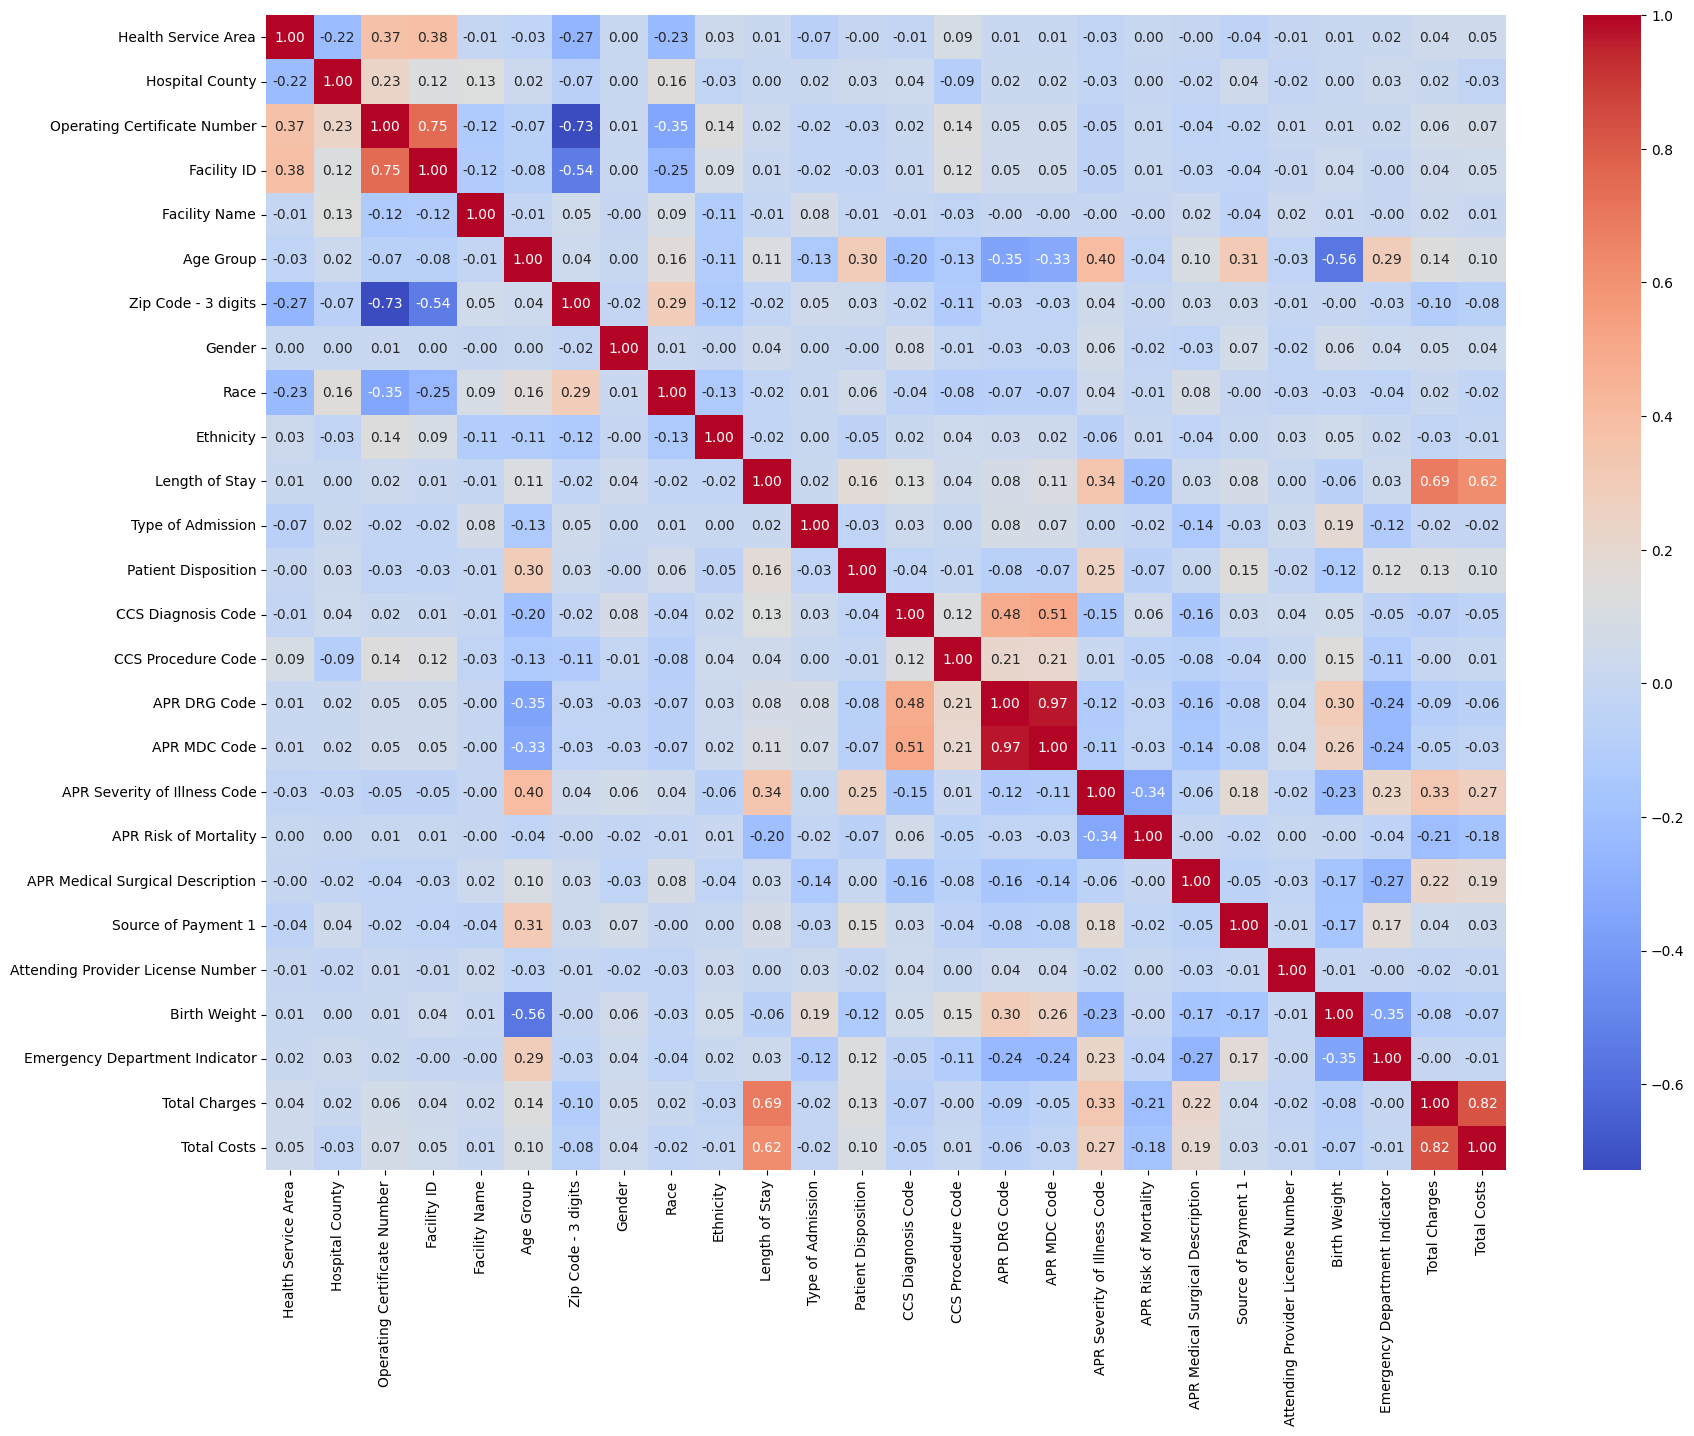

In [41]:
plt.figure(figsize=(20, 15))
sns.heatmap(hospital_data_final.corr(),annot=True, cmap='coolwarm',fmt=".2f")

### Handling Multicollinearity by Dropping Columns

I have taken some steps to address multicollinearity in the dataset by dropping specific columns. The columns removed are:

- `APR DRG Code`: This column is dropped because it is highly correlated with 'APR MDC Code.' Multicollinearity, where two or more features are highly correlated, can lead to issues in modeling and interpretation.

- `Total Charges`: As this column is highly correlated with 'Total Costs,' we choose to remove it to avoid redundancy and multicollinearity.

- `Operating Certificate Number`: This column is highly correlated with 'Facility ID' and also highly negatively correlated with 'Zip Code - 3 digits.' To mitigate multicollinearity, we opt to remove it.

By eliminating these columns, we aim to maintain a more independent set of features, which can improve the performance and interpretability of our analysis and modeling.


In [42]:
hospital_data_final = hospital_data_final.drop(['APR DRG Code', 'Total Charges', 'Operating Certificate Number'], axis=1)

Text(0.5, 1.0, 'Violin Plot')

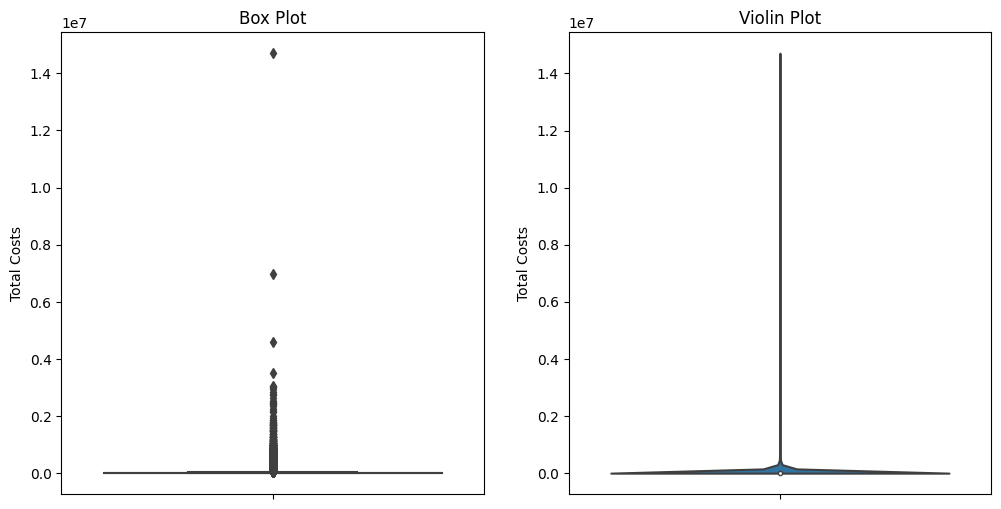

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(data = hospital_data_final, y = 'Total Costs', ax = axes[0])
axes[0].set_title('Box Plot')

sns.violinplot(data = hospital_data_final, y = 'Total Costs', ax = axes[1])
axes[1].set_title('Violin Plot')

Text(0.5, 1.0, 'Violin Plot')

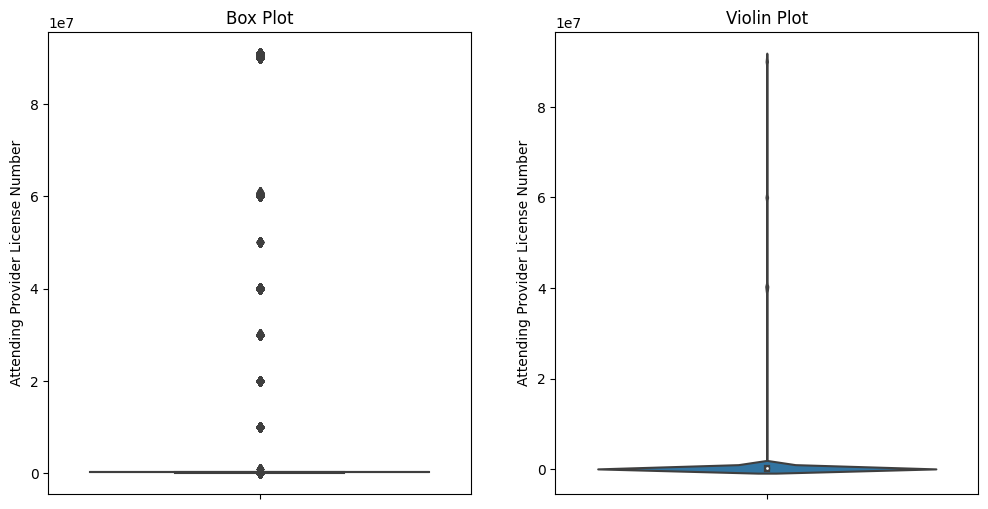

In [44]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(data = hospital_data_final, y = 'Attending Provider License Number', ax = axes[0])
axes[0].set_title('Box Plot')

sns.violinplot(data = hospital_data_final, y = 'Attending Provider License Number', ax = axes[1])
axes[1].set_title('Violin Plot')

Text(0.5, 1.0, 'Violin Plot')

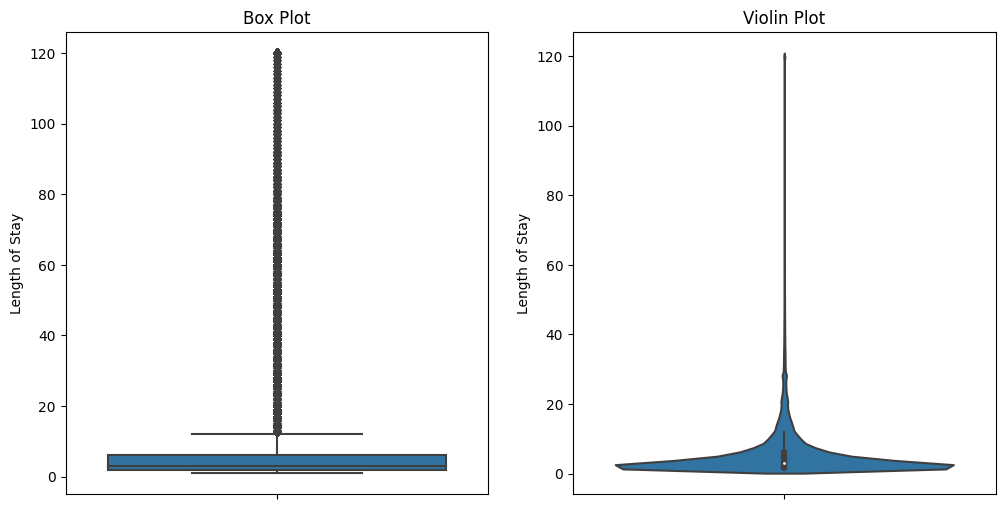

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(data = hospital_data_final, y = 'Length of Stay', ax = axes[0])
axes[0].set_title('Box Plot')

sns.violinplot(data = hospital_data_final, y = 'Length of Stay', ax = axes[1])
axes[1].set_title('Violin Plot')

### Outlier Detection and Removal

I have performed the detection and removal of outliers in the dataset. Outliers are data points that significantly deviate from the typical distribution of a feature and can potentially introduce noise into the analysis. We focus on the following features for outlier detection because they have continous values and it can have outliers:

- `Length of Stay`: The length of stay in the hospital.
- `Attending Provider License Number`: The license number of the attending provider.
- `Total Costs`: The total costs associated with the patient's stay.

The steps for outlier detection are as follows:

1. Calculate the first quartile (Q1) and third quartile (Q3) for each feature.
2. Compute the interquartile range (IQR) by subtracting Q1 from Q3.
3. Determine lower and upper bounds by applying a user-defined multiplier (1.5 times the IQR) to the IQR.
4. Identify and collect the indices of data points that fall outside these bounds as outliers.

Finally, we remove the identified outliers from the dataset by dropping the corresponding rows.

By performing this outlier detection and removal, we aim to enhance the robustness and reliability of our analysis by eliminating extreme data points that could adversely affect our results.


In [46]:
outlier_step = 1.5
features = ['Length of Stay','Attending Provider License Number','Total Costs']

outlier_list = []

for column in features:
    Q1 = np.percentile(hospital_data_final[column], 25)
    Q3 = np.percentile(hospital_data_final[column], 75)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - outlier_step * IQR
    upper_bound = Q3 + outlier_step * IQR
    
    outliers = hospital_data_final[(hospital_data_final[column] < lower_bound) | (hospital_data_final[column] > upper_bound)].index
    outlier_list.extend(outliers)

hospital_data_final = hospital_data_final.drop(outlier_list)

In [47]:
hospital_data_final

,Health Service Area,Hospital County,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Emergency Department Indicator,Total Costs
3,0,0,1.0,2,4,22,0,3,0,5,0,8,254.0,215.0,23,2,2,0,4,140796.0,0,0,4947.81
4,0,0,1.0,2,4,22,0,3,0,4,0,12,203.0,153.0,8,1,2,1,4,170254.0,0,0,16988.33
5,0,0,1.0,2,0,1,1,3,0,3,1,7,234.0,0.0,25,2,2,0,2,218155.0,0,0,3246.34
6,0,0,1.0,2,0,1,1,3,0,4,1,8,234.0,108.0,25,2,2,0,3,207219.0,0,1,6194.34
7,0,0,1.0,2,0,1,0,3,0,1,1,7,242.0,0.0,21,2,2,0,2,244921.0,0,1,1435.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617224,1,31,9059.0,42,1,36,0,3,0,2,0,13,661.0,219.0,20,1,2,0,7,169629.0,0,0,761.28
2617228,1,31,9059.0,42,2,36,0,3,0,5,0,13,661.0,219.0,20,2,2,0,3,169629.0,0,0,1859.70
2617229,1,31,9059.0,42,1,37,1,3,0,11,0,7,660.0,219.0,20,2,2,0,3,161633.0,0,0,3607.51
2617236,1,31,9059.0,42,1,48,1,3,0,2,0,13,661.0,219.0,20,1,2,0,3,161633.0,0,0,737.96


**Logistic Regression Hyperparameters:**
- Penalty: 'l1', 'l2'
- C: 0.3, 0.6, 0.9
- Solver: 'saga'
- Max Iterations: 200, 300, 500
- Multi-Class: 'multinomial'

In [48]:
param_logistic = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.3, 0.6, 0.9],
    'solver' : ['saga'],
    'max_iter' : [200,300,500],
    'multi_class' : ['multinomial'] 
}

**Visualizing Logistic Regression for Hospital Admission Types:** Subplots display model performance for each admission category, with accuracy, precision, recall, and F1 scores.


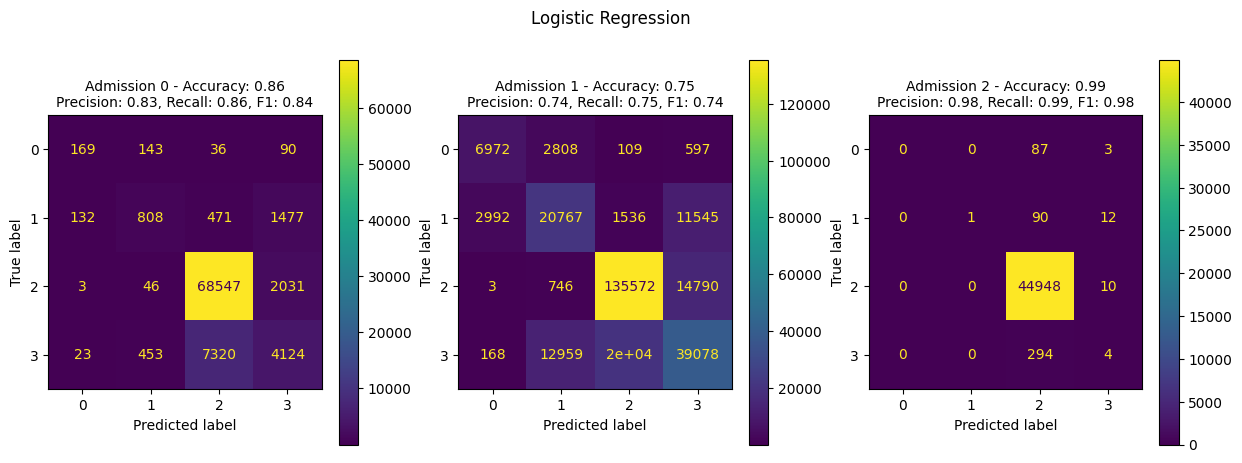

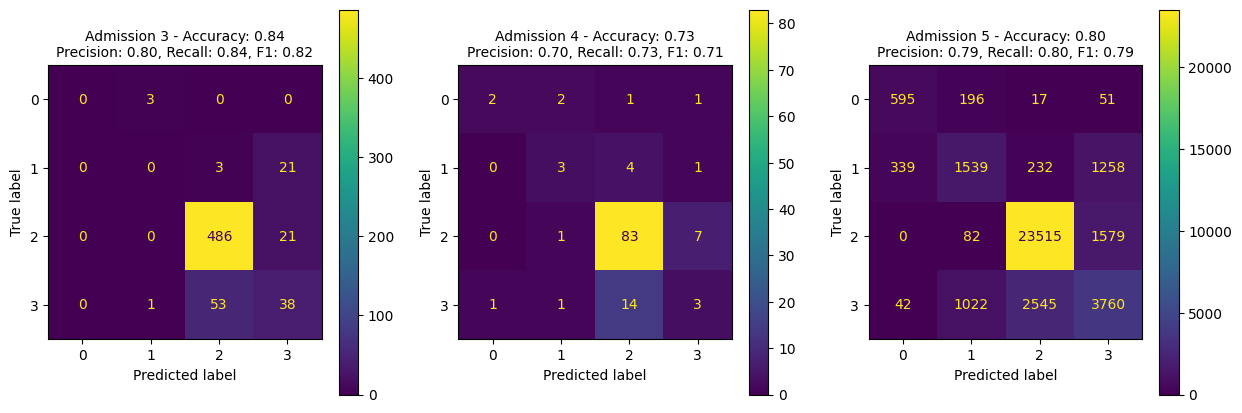

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
admissions = sorted(hospital_data_final['Type of Admission'].unique())
fig.suptitle('Logistic Regression')


for i, admission in enumerate(admissions):
    df = hospital_data_final[hospital_data_final['Type of Admission'] == admission].copy()
    df.drop(['Type of Admission'], axis=1, inplace=True)

    X = df.drop('APR Risk of Mortality', axis=1)
    y = df['APR Risk of Mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    sc = MinMaxScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    pca = PCA(n_components=0.95)
    X_train_scaled = pca.fit_transform(X_train_sc)
    X_test_scaled = pca.transform(X_test_sc)

    logistic_regression = GridSearchCV(LogisticRegression(), param_grid=param_logistic, cv=2, scoring='accuracy')
#     logistic_regression = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=200)
    logistic_regression.fit(X_train_scaled, y_train)

    y_pred = logistic_regression.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis', ax=axs[i % 3])
    disp.ax_.set_title(f'Admission {i} - Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}', fontsize=10)

    if i % 3 == 2 or i == len(admissions) - 1:
        plt.show()
        if i != len(admissions) - 1:
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))

**Naive Bayes Hyperparameters**: `alpha` (smoothing parameter) options include 0.1, 0.5, 1.0, and `fit_prior` (learn class prior probabilities) can be either True or False.


In [50]:

param_nb = {
    'alpha': [0.1, 0.5, 1.0],  
    'fit_prior': [True, False],      
}



**Multinomial Naive Bayes Classification:** Subplots illustrate the model's performance for different hospital admission types. The classifier is trained and evaluated using accuracy, precision, recall, and F1 scores.


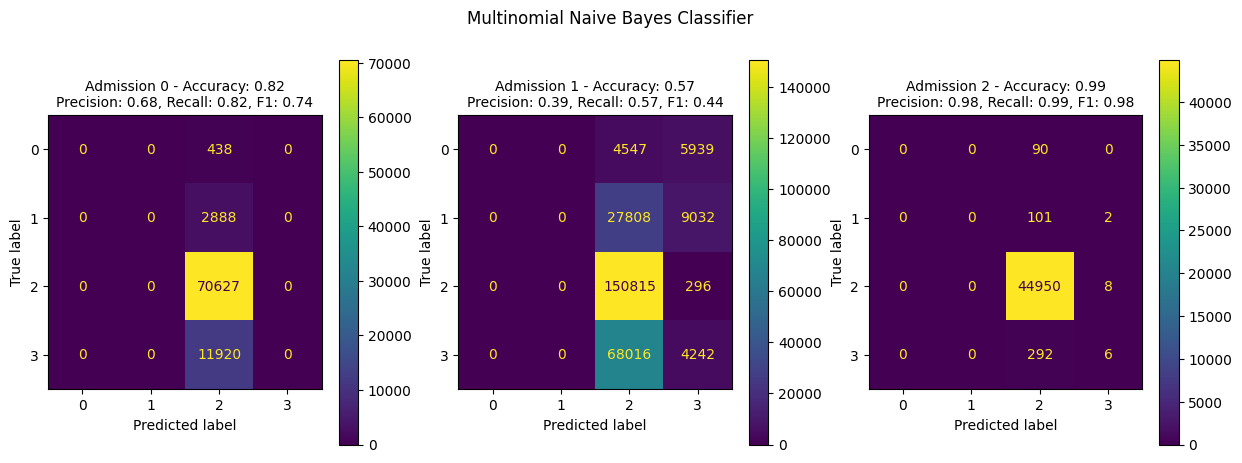

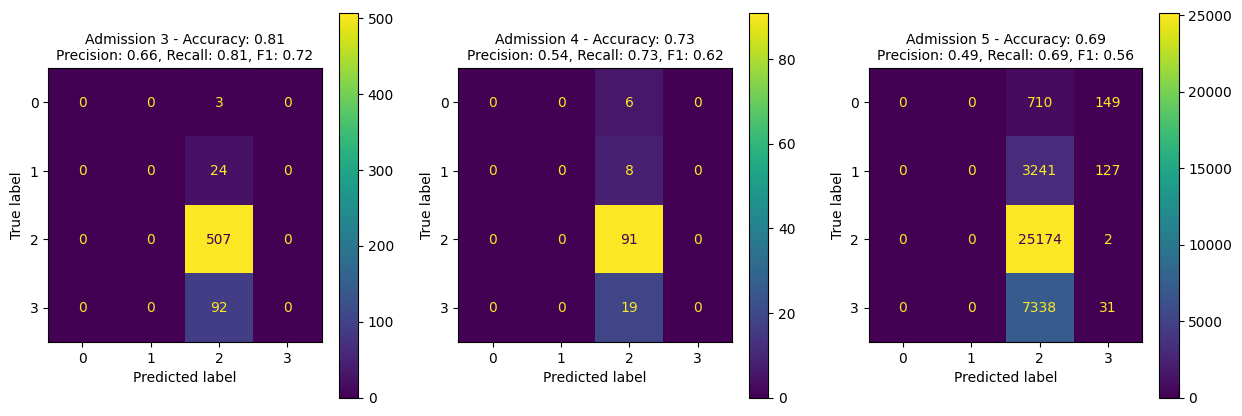

In [56]:





fig, axs = plt.subplots(1, 3, figsize=(15, 5))
admissions = sorted(hospital_data_final['Type of Admission'].unique())
fig.suptitle('Multinomial Naive Bayes Classifier')

for i, admission in enumerate(admissions):
    df = hospital_data_final[hospital_data_final['Type of Admission'] == admission].copy()
    df.drop(['Type of Admission'], axis=1, inplace=True)

    X = df.drop('APR Risk of Mortality', axis=1)
    y = df['APR Risk of Mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    sc = MinMaxScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)

    multinomial_nb = MultinomialNB()
    # You can use grid search for hyperparameter tuning if needed
    # multinomial_nb = GridSearchCV(MultinomialNB(), param_grid=param_nb, cv=2, scoring='accuracy')

    multinomial_nb.fit(X_train_sc, y_train)

    y_pred = multinomial_nb.predict(X_test_sc)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis', ax=axs[i % 3])
    disp.ax_.set_title(f'Admission {i} - Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}', fontsize=10)

    if i % 3 == 2 or i == len(admissions) - 1:
        plt.show()
        if i != len(admissions) - 1:
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))


**AdaBoost Hyperparameters:** Options include `n_estimators` (50, 100, 200), `learning_rate` (0.01, 0.1, 0.5), and `algorithm` ('SAMME', 'SAMME.R').


In [ ]:

param_adaboost = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.5],  
    'algorithm': ['SAMME', 'SAMME.R']  
    
}


**AdaBoost Classifier for Hospital Admission Types**: Subplots demonstrate the model's performance across different admission categories, showcasing accuracy, precision, recall, and F1 scores. Hyperparameter tuning options can be explored using grid search.


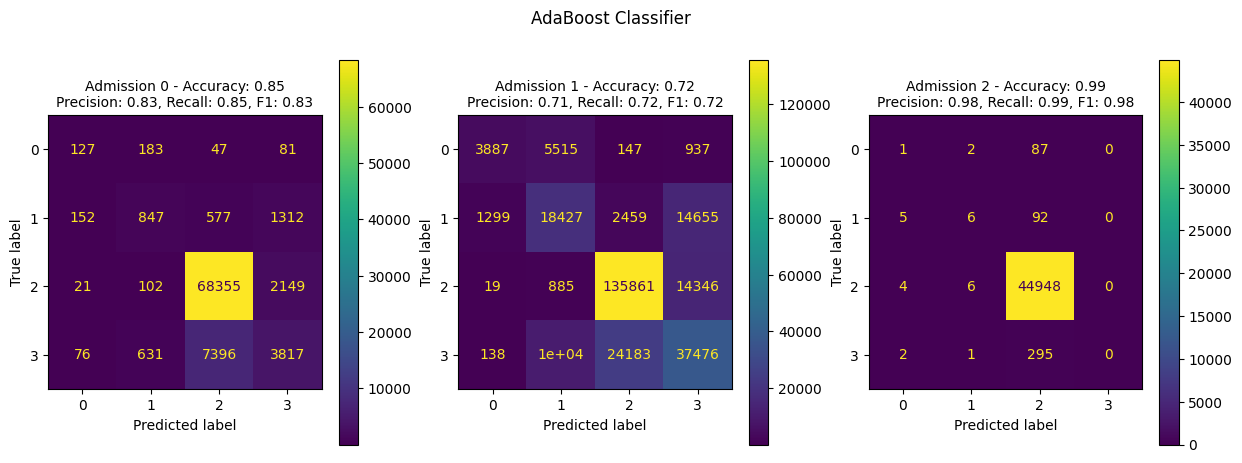

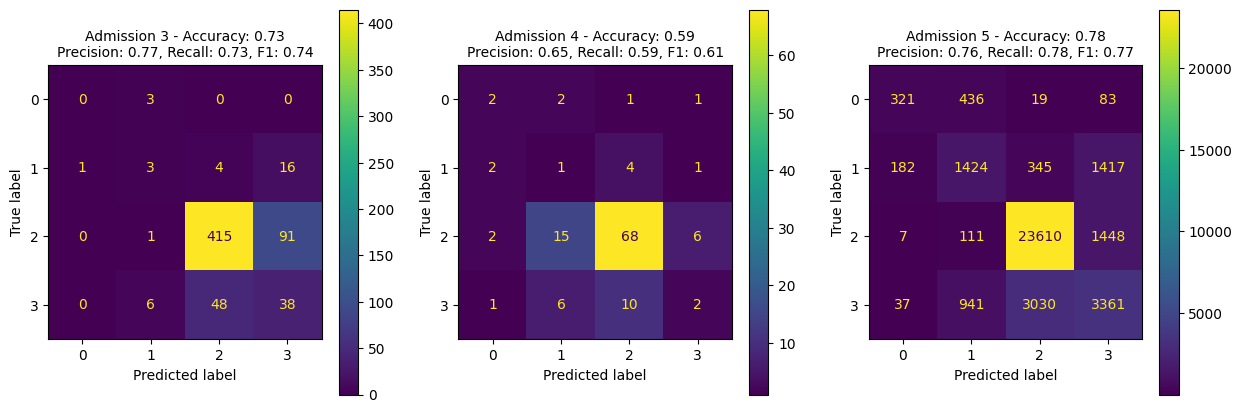

In [59]:


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
admissions = sorted(hospital_data_final['Type of Admission'].unique())
fig.suptitle('AdaBoost Classifier')

for i, admission in enumerate(admissions):
    df = hospital_data_final[hospital_data_final['Type of Admission'] == admission].copy()
    df.drop(['Type of Admission'], axis=1, inplace=True)

    X = df.drop('APR Risk of Mortality', axis=1)
    y = df['APR Risk of Mortality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    sc = MinMaxScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    pca = PCA(n_components=0.95)
    X_train_scaled = pca.fit_transform(X_train_sc)
    X_test_scaled = pca.transform(X_test_sc)

    adaboost = AdaBoostClassifier()
    # You can use grid search for hyperparameter tuning if needed
    # adaboost = GridSearchCV(AdaBoostClassifier(), param_grid=param_adaboost, cv=2, scoring='accuracy')
    
    adaboost.fit(X_train_scaled, y_train)

    y_pred = adaboost.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis', ax=axs[i % 3])
    disp.ax_.set_title(f'Admission {i} - Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}', fontsize=10)

    if i % 3 == 2 or i == len(admissions) - 1:
        plt.show()
        if i != len(admissions) - 1:
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
